# 4. DIVISIÓN DE DATOS

## 

1. **División representativa**: 70/30 u 80/20, manteniendo la distribución de la variable objetivo.  
2. **Verificación de distribución**: Confirmar que las estadísticas descriptivas (media, desviación, percentiles, rangos) sean similares en train y test.  
3. **Consideraciones temporales**: Si los datos tienen componente temporal, dividir cronológicamente (no aleatoriamente) manteniendo la distribución.  
4. **Manejo de valores extremos**: Asegurar que los outliers estén representados en ambos conjuntos.
5. **Validación de representatividad de variables predictoras**: Confirmar que las variables categóricas que se intuyen más importantes, estén representadas equitativamente
6. **Documentación de la división**: Guardar índices y semillas para garantizar reproducibilidad.

## 0. CARGA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
icfes = pd.read_parquet("icfes_analizado.parquet", engine="pyarrow")
icfes.sample(5)

,nacionalidad,region,etnia_estudiante,edad,presento_fuera_edad,num_personas_casa,num_cuartos_casa,estrato_casa,tiempo_internet,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros,tiempo_lectura,freq_leche_derivados,freq_carne_pescado_similares,freq_cereales_frutos_legumbres,nivel_edu_padre,actividad_padre,nivel_edu_madre,actividad_madre,horas_trabajo_semanal,colegio_genero,colegio_publico,colegio_area,colegio_jornada,puntaje_global,nse_estudiante,nse_colegio,educacion_padres,perfil_lector,actividad_padres
250324,Colombia,Pacífica,No,18,0,Hogar tradicional,3.00,1.00,Poco,0,1,0,1,1,0,0,0,None,No lee,Insuficiente,Óptimo,Aceptable,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajadores Operativos,Trabajo Ocasional,Mixto,No Oficial,Urbano,Tradicional,195,2.00,2.00,Bachillerato Completo,"Buen Apoyo, Poco Habito",Trabajadores Operativos
299472,Colombia,Pacífica,No,18,0,Más de 1 hogar,4.00,NaN,Poco,1,1,1,1,1,0,1,1,11-25,0-30 min,Aceptable,Insuficiente,Insuficiente,Primaria,Trabajadores Operativos,Primaria Inc,Trabajadores Operativos,Tiempo Parcial Reducido,Mixto,Oficial,Urbano,Tradicional,173,2.00,2.00,Educación Primaria,"Poco Apoyo, Poco Habito",Trabajadores Operativos
134840,Colombia,Caribe,No,16,0,Más de 1 hogar,6.00,5.00,Promedio,1,1,1,1,0,0,0,1,26-100,0-30 min,Óptimo,Óptimo,Insuficiente,Profesional,Profesionales,Postgrado,Trabajadores Operativos,Tiempo Parcial Reducido,Mixto,No Oficial,Urbano,Tradicional,275,3.00,4.00,Educación Superior,"Buen Apoyo, Poco Habito",Profesionales/Directivos
452616,Colombia,Andina,No,18,0,Hogar grande,5.00,3.00,Promedio,1,1,1,1,1,0,1,1,0-10,30-60 min,Óptimo,Óptimo,Aceptable,Bachiller,Trabajadores Operativos,Bachiller,Trabajadores Operativos,No Trabaja,Mixto,Oficial,Urbano,Tradicional,222,3.00,3.00,Bachillerato Completo,"Poco Apoyo, Buen Habito",Trabajadores Operativos
182238,Colombia,Andina,No,16,0,Hogar tradicional,4.00,3.00,Mucho,0,1,0,1,1,1,1,0,0-10,0-30 min,Óptimo,Óptimo,Óptimo,Bachiller,Sin Actividad Remunerada,Bachiller,Trabajador Independiente,No Trabaja,Mixto,Oficial,Urbano,Unica,209,3.00,2.00,Bachillerato Completo,"Poco Apoyo, Poco Habito",Empresarios/Independientes


In [3]:
icfes.shape

(506056, 37)

In [4]:
icfes = icfes.dropna()

## 1. DIVISIÓN REPRESENTATIVA

In [5]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'puntaje_global' es la variable objetivo (Y)
X = icfes.drop(columns=['puntaje_global'])  # Características
y = icfes['puntaje_global']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
X_train.shape

(337706, 36)

In [7]:
icfesx = X_train.copy()

## 2. VERIFICACIÓN DE LA DISTRIBUCIÓN


Train
count   337706.00
mean       250.34
std         50.72
min        106.00
25%        212.00
50%        247.00
75%        286.00
max        477.00
Name: puntaje_global, dtype: float64

Test
count   84427.00
mean      250.62
std        50.66
min       108.00
25%       212.00
50%       248.00
75%       287.00
max       467.00
Name: puntaje_global, dtype: float64


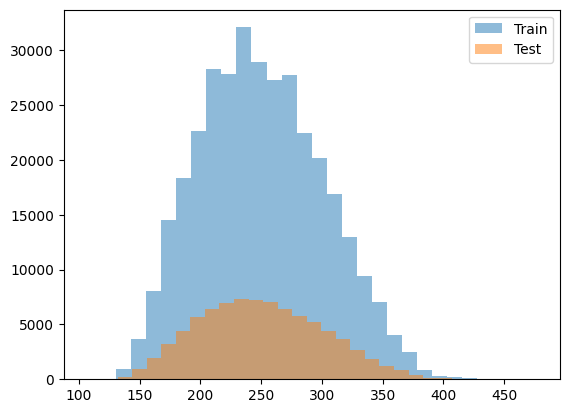

In [8]:
for split, data in zip(
    ["Train", "Test"],
    [y_train, y_test]
):
    print(f"\n{split}")
    print(data.describe())
    
plt.hist(y_train, bins=30, alpha=0.5, label="Train")
plt.hist(y_test, bins=30, alpha=0.5, label="Test")
plt.legend()
plt.show()


## 4. VERIFICACIÓN DE VALORES EXTREMOS

In [9]:
q_low, q_high = y.quantile([0.01, 0.99])  # percentiles extremos
extremos = icfes[(y <= q_low) | (y >= q_high)]

print("Valores extremos totales:", len(extremos))
print("Distribución en train/test:")
print((y_train <= q_low).sum(), (y_test <= q_low).sum())

Valores extremos totales: 9099
Distribución en train/test:
3775 911


## 5. VALIDACIÓN DE REPRESENTATIVIDAD DE VARIABLES PREDECITIVAS

In [10]:
cat = ['colegio_publico', 'colegio_jornada', 'colegio_genero', 'colegio_area']

for var in cat:
    print(f"\n--- Distribución de {var} ---")
    for split, data in zip(["Train", "Test"], [X_train, X_test]):
        dist = data[var].value_counts(normalize=True).sort_index()
        print(f"\n{split}:")
        print(dist.round(3))


--- Distribución de colegio_publico ---

Train:
colegio_publico
No Oficial   0.24
Oficial      0.76
Name: proportion, dtype: float64

Test:
colegio_publico
No Oficial   0.24
Oficial      0.76
Name: proportion, dtype: float64

--- Distribución de colegio_jornada ---

Train:
colegio_jornada
Completa      0.18
Tradicional   0.58
Unica         0.13
Validación    0.12
Name: proportion, dtype: float64

Test:
colegio_jornada
Completa      0.18
Tradicional   0.58
Unica         0.13
Validación    0.11
Name: proportion, dtype: float64

--- Distribución de colegio_genero ---

Train:
colegio_genero
Femenino    0.03
Masculino   0.01
Mixto       0.96
Name: proportion, dtype: float64

Test:
colegio_genero
Femenino    0.03
Masculino   0.01
Mixto       0.97
Name: proportion, dtype: float64

--- Distribución de colegio_area ---

Train:
colegio_area
Rural    0.15
Urbano   0.85
Name: proportion, dtype: float64

Test:
colegio_area
Rural    0.15
Urbano   0.85
Name: proportion, dtype: float64


## 6. DOCUMENTACIÓN DE LA DIVISIÓN

In [11]:
import json
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42  # semilla fija
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
    # SIN stratify para regresión
)

# Guardar info en JSON (índices + semilla)
split_info = {
    "random_seed": RANDOM_SEED,
    "train_indices": list(X_train.index),
    "test_indices": list(X_test.index)
}

with open("split_documentation.json", "w") as f:
    json.dump(split_info, f)


In [12]:
x_train = X_train.copy()

## 7. GUARDAR LOS ARCHIVOS DE ENTRENAMIENTO Y PRUEBA

In [13]:
# Guardar en Parquet
X_train.to_parquet("X_train.parquet", index=False)
X_test.to_parquet("X_test.parquet", index=False)

# Como y_train y y_test son Series, las pasamos a DataFrame para mantener el nombre de la columna
y_train.to_frame(name="puntaje_global").to_parquet("y_train.parquet", index=False)
y_test.to_frame(name="puntaje_global").to_parquet("y_test.parquet", index=False)

print("✅ Splits guardados en Parquet")

✅ Splits guardados en Parquet
